# Farmlink EDA

## Importing

In [41]:
import numpy as np

import pandas as pd

import re

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
data = pd.read_csv("Farmlink_Project_Data.xlsx - Sheet1.csv")
data.head(5)

,id,status,Sends,Opens,Clicks,lifetodategiving,yeartodategiving,lastgiftamount,lastgiftdate,ContactType,MonetaryTier,DonorStatus,IndividualDonorType,Tier3Classification
0,c3bbc3140962170f3cbf11f3d4064b5c,unsubscribed,103,19,1,208,0,1,7/17/2020,Donor,Silver,SingleDonor,Multiple Single Donations,Multiple Single Donations
1,4952c138fb131d36003b38f742ac2733,subscribed,103,84,2,0,0,0,NaN,Non-Donor,NaN,NaN,NaN,NaN
2,7244ab4036d24fd2560de91a281485ac,subscribed,113,122,0,500,0,500,4/28/2020,Donor,Platinum,SingleDonor,Single Donor,Single Donor
3,ca8f96d7edb2ff654be07db2ebbd98c2,subscribed,112,244,4,0,0,517,2/5/2021,Donor,Platinum,SingleDonor,Multiple Single Donations,Multiple Single Donations
4,e3cd0764e745f7baa17c5b2fb6682fde,subscribed,112,69,0,500,0,500,4/30/2020,Donor,Platinum,SingleDonor,Single Donor,Single Donor


## Data Cleaning / EDA

### Fixing types

In [43]:
data.dtypes

id                     object
status                 object
Sends                   int64
Opens                   int64
Clicks                  int64
lifetodategiving        int64
yeartodategiving        int64
lastgiftamount          int64
lastgiftdate           object
ContactType            object
MonetaryTier           object
DonorStatus            object
IndividualDonorType    object
Tier3Classification    object
dtype: object

### Check Uniqueness

In [44]:
print(len(data["id"].unique()))
print(len(data["id"]))

17338
18372


### EDA for barplot with dates

In [74]:
def yearmonth(lastgiftdate):
    return re.findall(r"(\d*)\/\d*\/(20\d{2})", lastgiftdate)

In [75]:
data_lastgiftdate_NA_removed = data.dropna(0, subset=['lastgiftdate'])

data_lastgiftdate_NA_removed["year-month"] = data_lastgiftdate_NA_removed["lastgiftdate"].apply(lambda x: yearmonth(x)[0])
data_lastgiftdate_NA_removed.head()

/var/folders/l8/8th40h4539jf6pqzg90qhps00000gn/T/ipykernel_39114/2696373013.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  data_lastgiftdate_NA_removed = data.dropna(0, subset=['lastgiftdate'])
/var/folders/l8/8th40h4539jf6pqzg90qhps00000gn/T/ipykernel_39114/2696373013.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_lastgiftdate_NA_removed["year-month"] = data_lastgiftdate_NA_removed["lastgiftdate"].apply(lambda x: yearmonth(x)[0])


,id,status,Sends,Opens,Clicks,lifetodategiving,yeartodategiving,lastgiftamount,lastgiftdate,ContactType,MonetaryTier,DonorStatus,IndividualDonorType,Tier3Classification,year-month
0,c3bbc3140962170f3cbf11f3d4064b5c,unsubscribed,103,19,1,208,0,1,7/17/2020,Donor,Silver,SingleDonor,Multiple Single Donations,Multiple Single Donations,"(7, 2020)"
2,7244ab4036d24fd2560de91a281485ac,subscribed,113,122,0,500,0,500,4/28/2020,Donor,Platinum,SingleDonor,Single Donor,Single Donor,"(4, 2020)"
3,ca8f96d7edb2ff654be07db2ebbd98c2,subscribed,112,244,4,0,0,517,2/5/2021,Donor,Platinum,SingleDonor,Multiple Single Donations,Multiple Single Donations,"(2, 2021)"
4,e3cd0764e745f7baa17c5b2fb6682fde,subscribed,112,69,0,500,0,500,4/30/2020,Donor,Platinum,SingleDonor,Single Donor,Single Donor,"(4, 2020)"
5,f2dc342b1d09946ead3875988c128ac3,subscribed,112,3,0,500,0,500,5/1/2020,Donor,Platinum,SingleDonor,Single Donor,Single Donor,"(5, 2020)"


In [76]:
data_lastgiftdate_NA_removed.groupby(by = "year-month").sum()

/var/folders/l8/8th40h4539jf6pqzg90qhps00000gn/T/ipykernel_39114/2453621189.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_lastgiftdate_NA_removed.groupby(by = "year-month").sum()


,Sends,Opens,Clicks,lifetodategiving,yeartodategiving,lastgiftamount
year-month,,,,,,
"(1, 2021)",9168,4451,321,19024,0,11992
"(1, 2022)",6781,4023,129,21323,16775,16749
"(10, 2020)",7473,4346,256,21526,0,13083
"(10, 2021)",10820,6262,383,39417,0,10193
"(11, 2020)",123543,54981,3281,215622,0,198126
"(11, 2021)",18605,17091,1062,48000,0,23301
"(12, 2020)",69587,38404,3036,158721,0,122621
"(12, 2021)",32495,25372,1545,108682,0,75427
"(2, 2021)",28854,17325,788,62561,0,30662


## Visualizations

<Axes: >

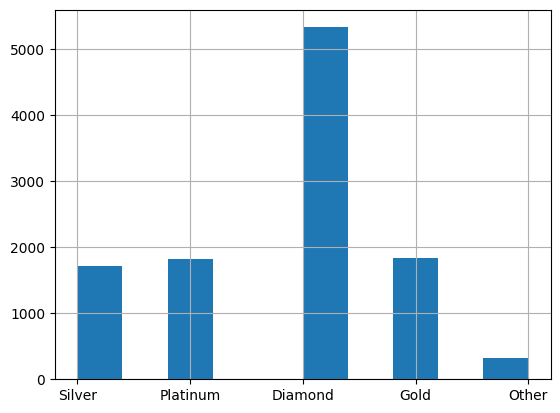

In [22]:
data["MonetaryTier"].hist()

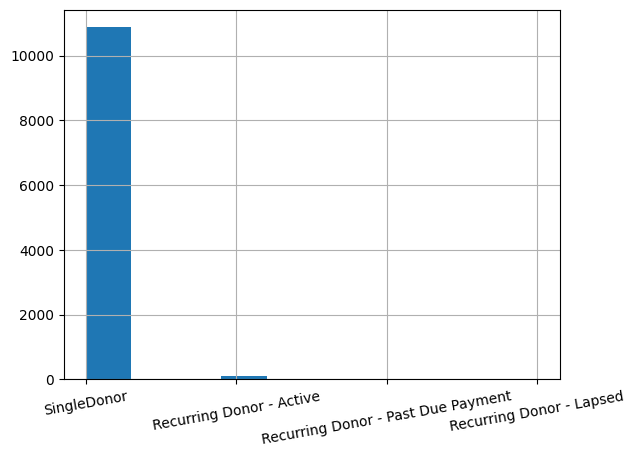

In [27]:
data["DonorStatus"].hist()
plt.xticks(rotation=10);